#### Keras 回归测试

In [1]:
import sys
sys.path.append("..")

import keras
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LSTM
from stock_ai import ploter
from examples import get_data_np as get_data

Using TensorFlow backend.


PLEASE install TALIB to call these methods
PLEASE install TALIB to call these methods


##### 获取数据

完整数据为601398日线数据+399300日线数据

默认取3天的数据作为输入数据。第四天的数据为结果数据。以此类推。采用 `TimeseriesGenerator`

In [2]:
(x_train, y_train), (x_test, y_test) = get_data(round=4, onehot=False)

print(x_train.shape, 'x_train sequences')
print(y_train.shape, 'y_train sequences')
print(x_test.shape, 'x_test sequences')
print(y_test.shape, 'y_test sequences')

(2681, 3, 13) x_train sequences
(2681,) y_train sequences
(298, 3, 13) x_test sequences
(298,) y_test sequences


`x`为去掉601398的close数据后的所有数据（标准化后）。

标准化采用的是`sklearn.preprocessing.MinMaxScaler`

In [3]:
x_train[-1]

array([[1.        , 0.        , 0.67447496, 0.15714792, 0.453125  ,
        0.47692308, 0.54885093, 0.        , 1.        , 0.66666667,
        0.        , 0.89512772, 0.89204042],
       [0.64562118, 0.00490852, 0.        , 0.        , 0.        ,
        1.        , 1.        , 0.8889254 , 0.33333333, 1.        ,
        1.        , 1.        , 1.        ],
       [0.        , 1.        , 1.        , 1.        , 1.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.5       , 0.        , 0.        ]])

`y`为601398的close.pct_change()后的数据。数据保留4位小数。

In [4]:
y_train[-1]

0.0033

In [5]:
print('Building model...')

batch_size = 32
epochs = 100

model = Sequential()
model.add(
    LSTM(512,
         input_shape=x_train[0].shape,
         activation='relu',
         return_sequences=True))
model.add(LSTM(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    validation_split=0.1)

Building model...
Instructions for updating:
Colocations handled automatically by placer.


QUANTAXIS>> From C:\Users\GuQiang\Anaconda3\envs\stock_ai\lib\site-packages\tensorflow\python\framework\op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


QUANTAXIS>> From C:\Users\GuQiang\Anaconda3\envs\stock_ai\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.cast instead.


QUANTAXIS>> From C:\Users\GuQiang\Anaconda3\envs\stock_ai\lib\site-packages\tensorflow\python\ops\math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


Train on 2412 samples, validate on 269 samples
Epoch 1/10
 - 9s - loss: 7.7437e-04 - mean_absolute_error: 0.0155 - val_loss: 1.4680e-04 - val_mean_absolute_error: 0.0096
Epoch 2/10
 - 8s - loss: 3.6681e-04 - mean_absolute_error: 0.0127 - val_loss: 9.4682e-05 - val_mean_absolute_error: 0.0070
Epoch 3/10
 - 9s - loss: 3.6031e-04 - mean_absolute_error: 0.0125 - val_loss: 9.7204e-05 - val_mean_absolute_error: 0.0071
Epoch 4/10
 - 8s - loss: 3.6242e-04 - mean_absolute_error: 0.0125 - val_loss: 9.5560e-05 - val_mean_absolute_error: 0.0070
Epoch 5/10
 - 8s - loss: 3.5920e-04 - mean_absolute_error: 0.0125 - val_loss: 9.7763e-05 - val_mean_absolute_error: 0.0071
Epoch 6/10
 - 8s - loss: 3.6102e-04 - mean_absolute_error: 0.0125 - val_loss: 9.4860e-05 - val_mean_absolute_error: 0.0069
Epoch 7/10
 - 8s - loss: 3.5808e-04 - mean_absolute_error: 0.0125 - val_loss: 9.4831e-05 - val_mean_absolute_error: 0.0069
Epoch 8/10
 - 8s - loss: 3.5743e-04 - mean_absolute_error: 0.0124 - val_loss: 1.1004e-04 - v

In [6]:
keras.utils.print_summary(model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 3, 512)            1077248   
_________________________________________________________________
lstm_2 (LSTM)                (None, 512)               2099200   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 3,176,961
Trainable params: 3,176,961
Non-trainable params: 0
_________________________________________________________________


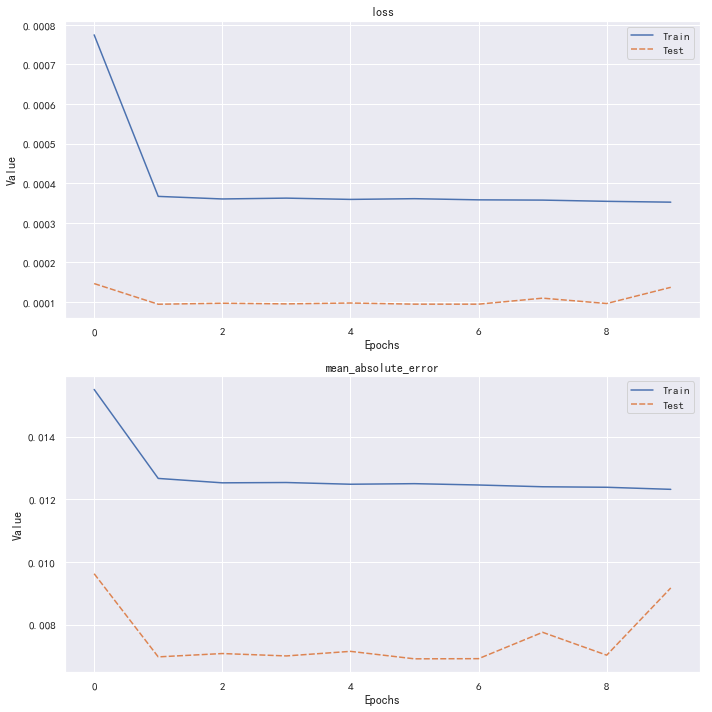

<module 'matplotlib.pyplot' from 'C:\\Users\\GuQiang\\Anaconda3\\envs\\stock_ai\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [7]:
ploter.plot_keras_history(history)

In [22]:
score = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)
'Test MSE score:{0}, \n Test MAE score:{1}'.format(score[0], score[1])

298/298 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - 0s 850us/step


'Test MSE score:0.00027021129829293405, \n Test MAE score:0.012013210640007618'

In [18]:
def plot_pred_compare_real(real, pred, **kwargs):
    plots = []
    d = pd.DataFrame({'real': real, 'pred': pred.reshape(pred.shape[0])})
    # d['c']=abs(d['pred']-d['real'])/d['real']
    # print(d)
    ax = sns.lineplot(data=d)
    title = kwargs.pop('title', None)
    if title:
        ax.set_title(title, fontsize='x-small')

    fig, axs = plt.subplots(nrows=2)
    sns.lineplot(data=d, ax=axs[0])
    c=pd.DataFrame((d['pred'] - d['real']) / d['real'])
    sns.lineplot(data=c,ax=axs[1])
    print(c.describe())
    plt.tight_layout()
    plt.show()

                0
count  298.000000
mean         -inf
std           NaN
min          -inf
25%     -1.721391
50%     -1.112138
75%     -0.450214
max      3.190885


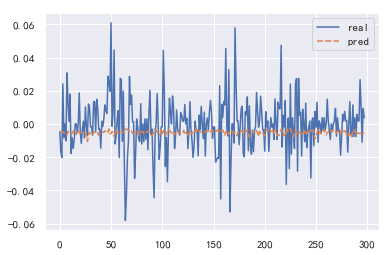

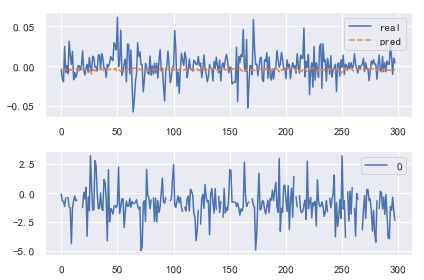

In [10]:
plot_pred_compare_real(y_test,model.predict(x_test))